# ML2 Final Project EDA

In [1]:
import pandas as pd
import numpy as np
import os


# Step 1: Load data and perform basic cleaning
try:
    df = pd.read_csv('/Users/gracesun/Desktop/ML2 Final EDA/cleaned_tmdb_data.csv') 
except FileNotFoundError:
    print("Error: File 'cleaned_tmdb_data.csv' not found. Please ensure the file is in the working directory.")
    exit(1)

# Handle missing values for numerical columns
numerical_cols = ['vote_average', 'vote_count', 'imdb_rating', 'imdb_votes', 'popularity', 'revenue', 'runtime', 'budget', 'release_year', 'release_month']
for col in numerical_cols:
    if col in ['vote_count', 'imdb_votes']:
        df[col] = df[col].fillna(0)  # Zero votes are valid
    else:
        df[col] = df[col].fillna(df[col].median())

# Handle missing values for categorical columns
categorical_cols = ['cast', 'director', 'writers', 'producers', 'production_companies', 'genres', 'original_language', 'status', 'production_countries', 'spoken_languages']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown').str.strip()

# Validate release_year
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df = df[df['release_year'].between(1900, 2025)]  # Filter valid years
df['release_month'] = pd.to_numeric(df['release_month'], errors='coerce').fillna(1).astype(int)

# Preview dataset
print("DataFrame head:")
print(df.head(), "\n")
print("DataFrame info:")
print(df.info(), "\n")
print("Missing values per column:")
print(df.isnull().sum(), "\n")

DataFrame head:
   id           title  vote_average  vote_count    status      revenue  \
0   5      Four Rooms         5.862      2688.0  Released    4257354.0   
1   6  Judgment Night         6.500       349.0  Released   12136938.0   
2  11       Star Wars         8.204     21140.0  Released  775398007.0   
3  12    Finding Nemo         7.816     19646.0  Released  940335536.0   
4  13    Forrest Gump         8.468     28192.0  Released  677387716.0   

   runtime      budget original_language  original_title  ...  \
0     98.0   4000000.0                en      Four Rooms  ...   
1    109.0  21000000.0                en  Judgment Night  ...   
2    121.0  11000000.0                en       Star Wars  ...   
3    100.0  94000000.0                en    Finding Nemo  ...   
4    142.0  55000000.0                en    Forrest Gump  ...   

       production_countries spoken_languages  \
0  United States of America          English   
1  United States of America          English   
2  U

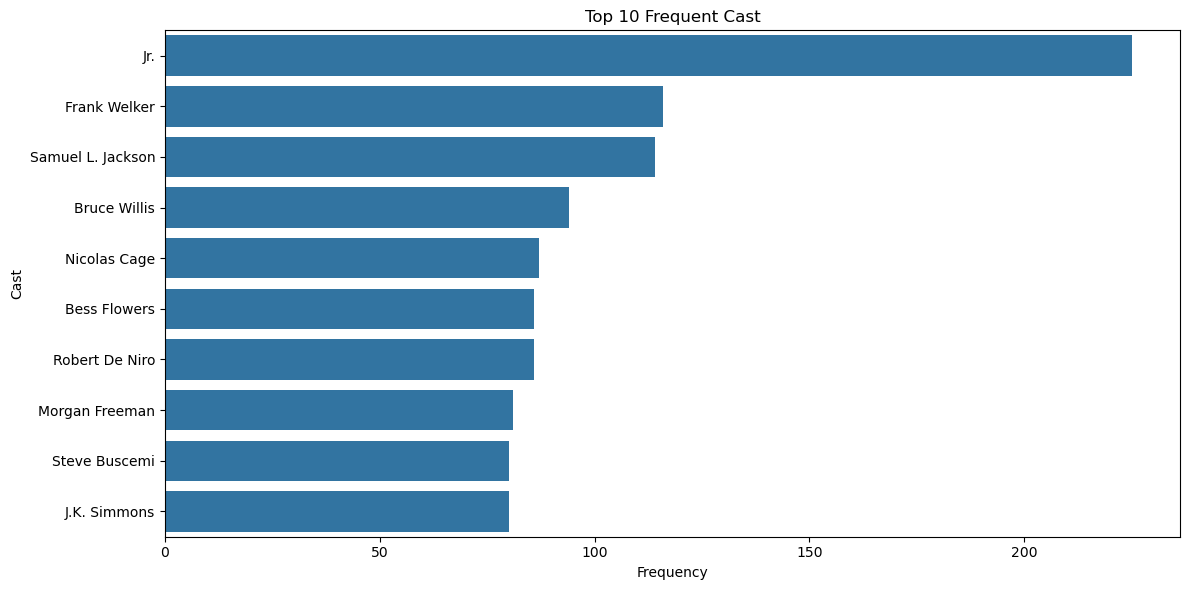


Top 10 frequent Cast:
Name                                     Frequency  Avg Vote   Avg Pop    Avg IMDb  
--------------------------------------------------------------------------------
Jr.                                      225        6.36       6.65       6.39      
Frank Welker                             116        6.35       8.62       6.16      
Samuel L. Jackson                        114        6.63       8.27       6.64      
Bruce Willis                             94         6.21       5.95       6.02      
Nicolas Cage                             87         6.18       5.04       6.14      
Bess Flowers                             86         6.83       3.54       7.17      
Robert De Niro                           86         6.67       5.79       6.74      
Morgan Freeman                           81         6.54       7.14       6.64      
Steve Buscemi                            80         6.57       6.28       6.54      
J.K. Simmons                             80   

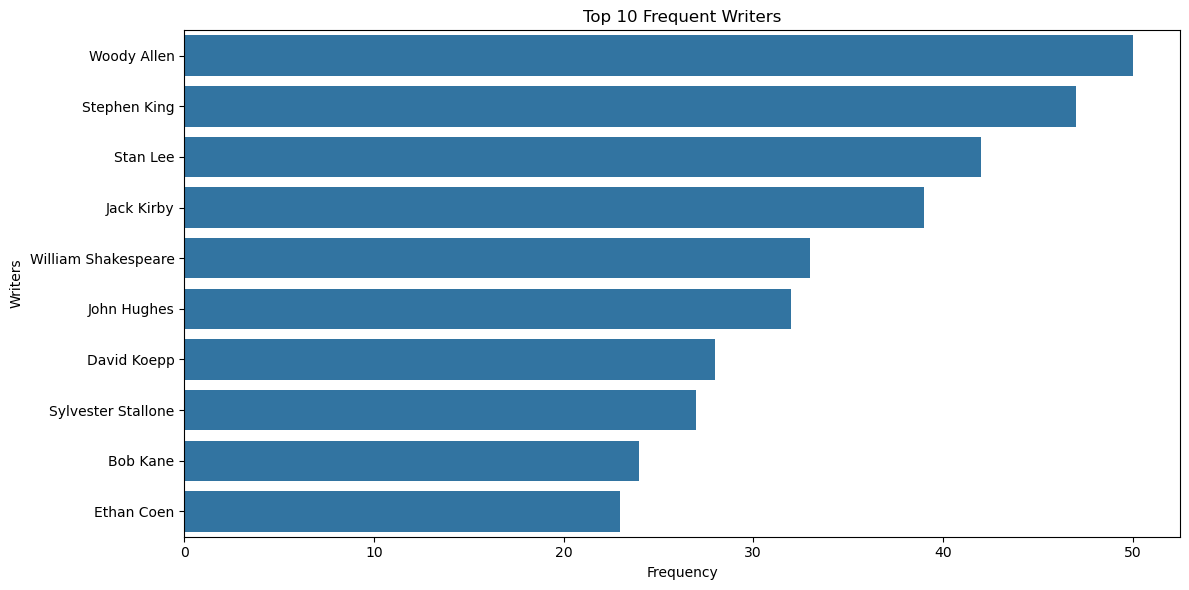


Top 10 frequent Writers:
Name                                     Frequency  Avg Vote   Avg Pop    Avg IMDb  
--------------------------------------------------------------------------------
Woody Allen                              50         6.75       2.34       6.93      
Stephen King                             47         6.44       7.62       6.32      
Stan Lee                                 42         6.58       19.38      6.84      
Jack Kirby                               39         6.70       24.10      6.82      
William Shakespeare                      33         6.46       3.09       6.47      
John Hughes                              32         6.44       6.64       6.39      
David Koepp                              28         6.48       9.58       6.57      
Sylvester Stallone                       27         6.52       21.59      6.33      
Bob Kane                                 24         6.78       12.65      6.78      
Ethan Coen                               23

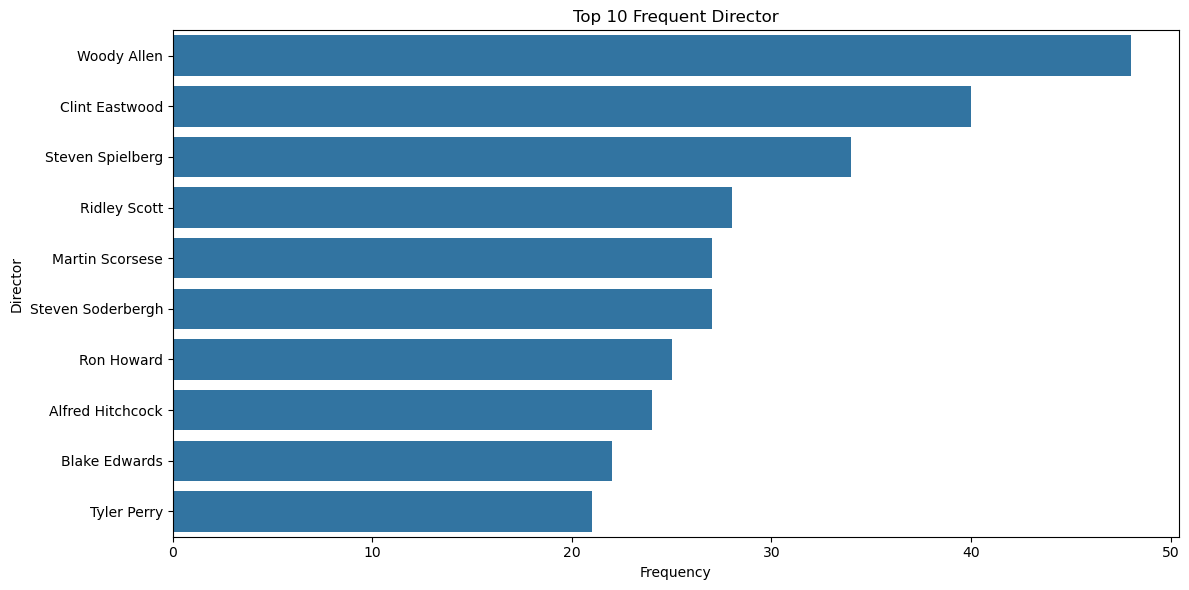


Top 10 frequent Director:
Name                                     Frequency  Avg Vote   Avg Pop    Avg IMDb  
--------------------------------------------------------------------------------
Woody Allen                              48         6.77       2.24       6.96      
Clint Eastwood                           40         6.84       4.69       6.95      
Steven Spielberg                         34         6.99       8.50       7.34      
Ridley Scott                             28         6.82       10.40      6.96      
Martin Scorsese                          27         7.52       7.42       7.61      
Steven Soderbergh                        27         6.40       7.08       6.59      
Ron Howard                               25         6.72       6.63       6.87      
Alfred Hitchcock                         24         7.34       5.02       7.47      
Blake Edwards                            22         6.21       6.33       6.26      
Tyler Perry                              2

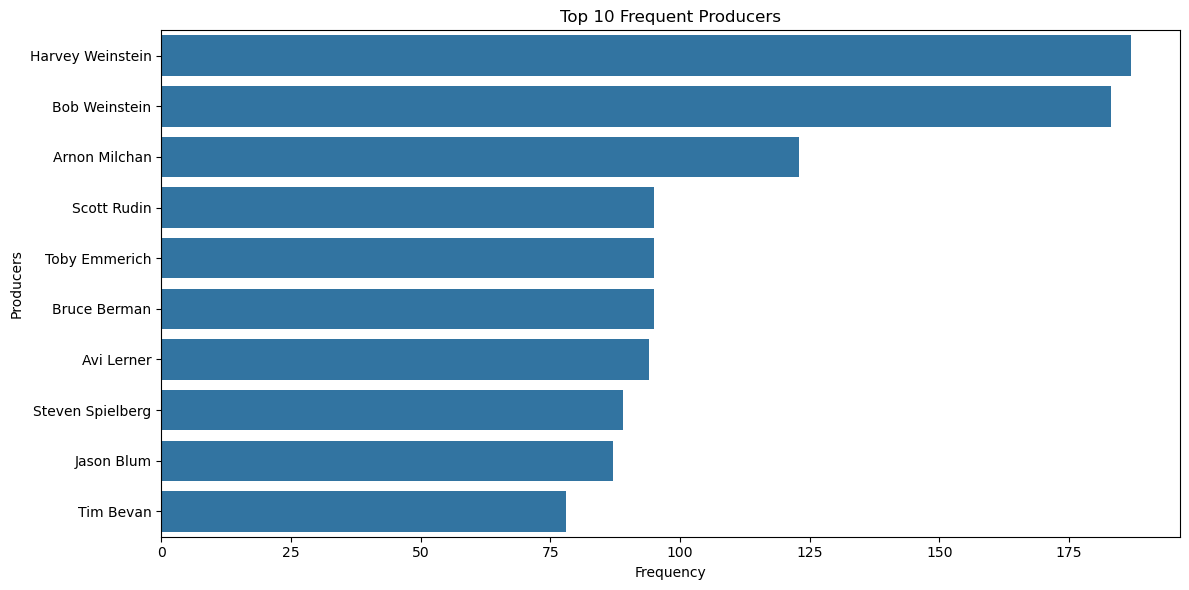


Top 10 frequent Producers:
Name                                     Frequency  Avg Vote   Avg Pop    Avg IMDb  
--------------------------------------------------------------------------------
Harvey Weinstein                         187        6.35       5.81       6.38      
Bob Weinstein                            183        6.34       5.78       6.36      
Arnon Milchan                            123        6.37       6.32       6.27      
Scott Rudin                              95         6.67       6.41       6.80      
Toby Emmerich                            95         6.37       13.03      6.26      
Bruce Berman                             95         6.43       6.83       6.33      
Avi Lerner                               94         5.79       5.71       5.57      
Steven Spielberg                         89         6.91       7.12       6.90      
Jason Blum                               87         6.17       8.61       5.79      
Tim Bevan                                

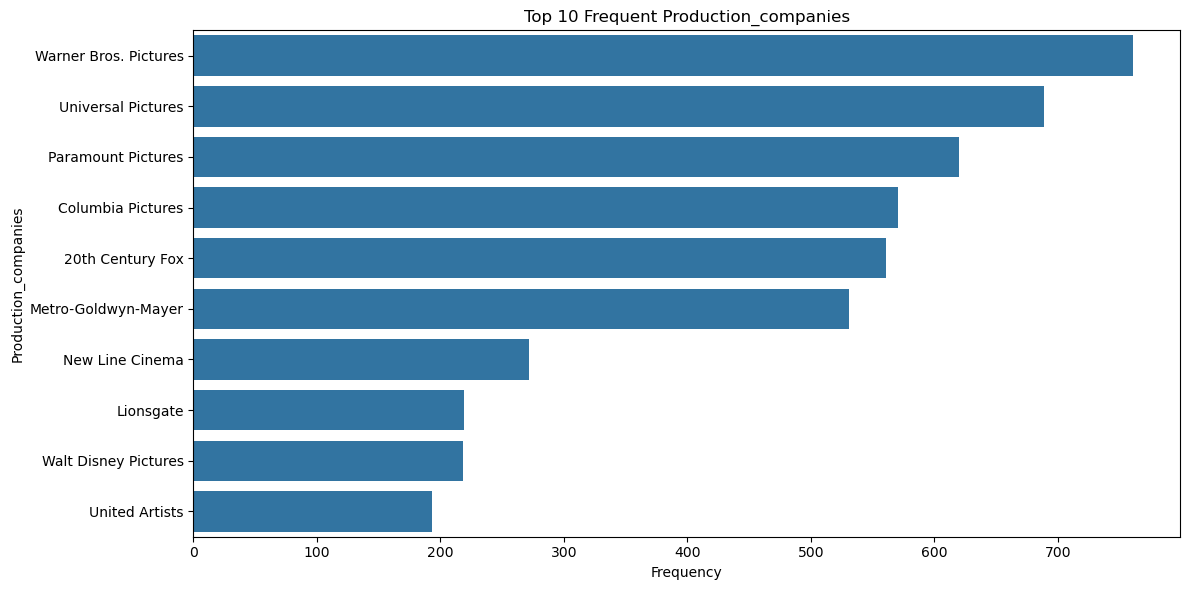


Top 10 frequent Production_companies:
Name                                     Frequency  Avg Vote   Avg Pop    Avg IMDb  
--------------------------------------------------------------------------------
Warner Bros. Pictures                    761        6.40       7.44       6.45      
Universal Pictures                       689        6.37       5.61       6.33      
Paramount Pictures                       620        6.32       5.89       6.41      
Columbia Pictures                        571        6.34       6.12       6.32      
20th Century Fox                         561        6.37       5.34       6.35      
Metro-Goldwyn-Mayer                      531        6.27       4.08       6.38      
New Line Cinema                          272        6.26       9.13       6.20      
Lionsgate                                219        6.30       6.28       5.91      
Walt Disney Pictures                     218        6.57       11.28      6.46      
United Artists                

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Frequency Analysis for cast, writers, director, producers, and production_companies
try:
    df = pd.read_csv('/Users/gracesun/Desktop/ML2 Final EDA/cleaned_tmdb_data.csv')
except FileNotFoundError:
    print("Error: File 'cleaned_tmdb_data.csv' not found. Please run Step 1 first.")
    exit(1)

# Columns to analyze
freq_cols = ['cast', 'writers', 'director', 'producers', 'production_companies']
freq_dict = {}
results = []

# Compute frequencies and display results
for col in freq_cols:
    if col in ['cast', 'writers', 'producers', 'production_companies']:
        # Split comma-separated values
        df[f'{col}_list'] = df[col].str.split(', ')
        # Explode to count individual entries
        counts = df[f'{col}_list'].explode().value_counts()
    else:
        # Director is single-valued
        counts = df[col].value_counts()
    
    # Determine top 10% threshold
    total = counts.sum()
    top_n_percent = 0.1
    cumulative = 0
    top_items = []
    for item, count in counts.items():
        cumulative += count
        top_items.append(item)
        if cumulative >= total * top_n_percent or len(top_items) >= max(1, int(len(counts) * top_n_percent)):
            break
    freq_dict[col] = top_items
    
    # Display bar plot for top 10 entries
    top_10 = counts.head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10.values, y=top_10.index)
    plt.title(f'Top 10 Frequent {col.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel(col.capitalize())
    plt.tight_layout()
    plt.show()
    
    # Compute metrics for top 10 entries
    for item in top_10.index:
        if col in ['cast', 'writers', 'producers', 'production_companies']:
            mask = df[f'{col}_list'].apply(lambda lst: item in lst if isinstance(lst, list) else False)
        else:
            mask = df[col] == item
        avg_vote = df.loc[mask, 'vote_average'].mean()
        avg_pop = df.loc[mask, 'popularity'].mean()
        avg_imdb = df.loc[mask, 'imdb_rating'].mean()
        results.append({
            'column': col,
            'name': item,
            'frequency': counts[item],
            'avg_vote_average': avg_vote,
            'avg_popularity': avg_pop,
            'avg_imdb_rating': avg_imdb
        })
    
    # Display table
    print(f"\nTop 10 frequent {col.capitalize()}:")
    print(f"{'Name':<40} {'Frequency':<10} {'Avg Vote':<10} {'Avg Pop':<10} {'Avg IMDb':<10}")
    print("-" * 80)
    for item in top_10.index:
        res = next(r for r in results if r['column'] == col and r['name'] == item)
        print(f"{item:<40} {res['frequency']:<10} {res['avg_vote_average']:<10.2f} {res['avg_popularity']:<10.2f} {res['avg_imdb_rating']:<10.2f}")


# I retained all columns—cast, writers, director, producers, and production_companies—because their top 30 entries, like Robert De Niro, Stephen King, Steven Spielberg, and Warner Bros., are influential and frequent, suggesting impact on movie success. Transforming them into counts (e.g., top_cast_count) allows me to quantify their effect for further analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Transform columns to count top 30 entries

# Columns to transform
freq_cols = ['cast', 'writers', 'director', 'producers', 'production_companies']
freq_dict = {}

# Compute top 30 entries for each column
for col in freq_cols:
    if col in ['cast', 'writers', 'producers', 'production_companies']:
        # Split comma-separated values
        df[f'{col}_list'] = df[col].str.split(', ')
        # Explode to count individual entries
        counts = df[f'{col}_list'].explode().value_counts()
    else:
        # Director is single-valued
        counts = df[col].value_counts()
    
    # Get top 30 entries
    top_30 = counts.head(30).index.tolist()
    freq_dict[col] = top_30

# Create new count columns and drop original columns
for col in freq_cols:
    top_30 = freq_dict[col]
    if col in ['cast', 'writers', 'producers', 'production_companies']:
        df[f'top_{col}_count'] = df[f'{col}_list'].apply(
            lambda lst: sum(item in top_30 for item in lst) if isinstance(lst, list) else 0
        )
    else:
        # Director is single-valued
        df[f'top_{col}_count'] = df[col].apply(lambda x: 1 if x in top_30 else 0)
    # Drop original and temporary list columns
    df = df.drop(columns=[col])
    if f'{col}_list' in df.columns:
        df = df.drop(columns=[f'{col}_list'])

# Display preview of transformed dataset with counts only
preview_cols = ['title'] + [f'top_{col}_count' for col in freq_cols]
print("\nPreview of transformed dataset (first 10 rows):")
print(df[preview_cols].head(10).to_string(index=False))

# Guidance for interpretation
print("\nInterpretation Guidance:")
print("- Each new column (e.g., top_cast_count) shows the count of top 30 frequent entries for that category.")
print("- A value of 0 means no top 30 entries are present; higher values indicate more top 30 entries.")
print("- Use these counts for further analysis (e.g., correlation with ratings or popularity).")


Preview of transformed dataset (first 10 rows):
                                                 title  top_cast_count  top_writers_count  top_director_count  top_producers_count  top_production_companies_count
                                            Four Rooms               1                  0                   0                    0                               1
                                        Judgment Night               0                  0                   0                    0                               1
                                             Star Wars               0                  1                   0                    0                               1
                                          Finding Nemo               1                  0                   0                    0                               0
                                          Forrest Gump               1                  0                   1                    0      

In [4]:
import pandas as pd
import numpy as np

# Step 4: Calculate historical averages by genre and release year

# 4.0 Add a unique movie identifier
df['movie_id'] = np.arange(len(df))

# 4.1 Split the “genres” column into a list of genres
df['genres_list'] = df['genres'].str.split(', ')

# 4.2 Explode so each row is one movie–genre pair
df_exploded = df.explode('genres_list').copy()

# 4.2.1 Drop rows where release_year is missing
df_exploded = df_exploded[df_exploded['release_year'].notna()]

# 4.3 Convert release_year to integer
df_exploded['release_year'] = df_exploded['release_year'].astype(int)

# 4.4 Compute per-(genre,year) averages
yearly_stats = (
    df_exploded
    .groupby(['genres_list','release_year'])
    .agg(
        vote_avg_year    = ('vote_average','mean'),
        vote_count_year  = ('vote_count',  'mean'),
        imdb_votes_year  = ('imdb_votes',  'mean'),
        imdb_rating_year = ('imdb_rating','mean'),
        popularity_year  = ('popularity',  'mean')
    )
    .reset_index()
)

# 4.5 Sort to prepare for cumulative calcs
yearly_stats = yearly_stats.sort_values(['genres_list','release_year'])

# 4.6 Compute historical averages excluding current year
for col in ['vote_avg_year','vote_count_year','imdb_votes_year','imdb_rating_year','popularity_year']:
    hist_col = 'hist_' + col.replace('_year','')
    cumsum = yearly_stats.groupby('genres_list')[col].cumsum() - yearly_stats[col]
    count  = yearly_stats.groupby('genres_list').cumcount()
    yearly_stats[hist_col] = cumsum / count.replace(0, np.nan)

# 4.7 Merge historical stats back to exploded DataFrame
df_exploded = df_exploded.merge(
    yearly_stats[
        ['genres_list','release_year',
         'hist_vote_avg','hist_vote_count',
         'hist_imdb_votes','hist_imdb_rating','hist_popularity']
    ],
    on=['genres_list','release_year'], how='left'
)

# 4.8 Aggregate back to one row per movie
historical_features = (
    df_exploded
    .groupby('movie_id')
    .agg(
        historical_vote_average = ('hist_vote_avg',    'mean'),
        historical_vote_count   = ('hist_vote_count',  'mean'),
        historical_imdb_votes   = ('hist_imdb_votes',  'mean'),
        historical_imdb_rating  = ('hist_imdb_rating', 'mean'),
        historical_popularity   = ('hist_popularity',  'mean')
    )
    .reset_index()
)

# 4.9 Merge into original df
df = df.merge(historical_features, on='movie_id', how='left')

# 4.10 Drop helper columns
df = df.drop(columns=['movie_id'])

# 4.11 Preview the new historical feature columns
preview_cols = [
    'title',
    'historical_vote_average',
    'historical_vote_count',
    'historical_imdb_votes',
    'historical_imdb_rating',
    'historical_popularity'
]
print("Preview of historical features:")
print(df[preview_cols].head(10).to_string(index=False))


Preview of historical features:
                                                 title  historical_vote_average  historical_vote_count  historical_imdb_votes  historical_imdb_rating  historical_popularity
                                            Four Rooms                 6.250056             442.217849           28894.284741                6.595636               3.540696
                                        Judgment Night                 6.499731             671.734420           45062.527749                6.709725               3.916827
                                             Star Wars                 6.271359             514.837109           28956.777344                6.512907               3.919877
                                          Finding Nemo                 6.441953            2010.874754           76380.263164                6.706515               5.396975
                                          Forrest Gump                 6.345363             430.112173 

In [5]:
# Step 5 (updated): Encode categorical variables with specified logic

# 5.1 One-hot encode each genre
df['genres_list'] = df['genres'].str.split(', ')
all_genres = sorted({
    g
    for lst in df['genres_list']
    if isinstance(lst, list)
    for g in lst
})
for genre in all_genres:
    col = f"genre_{genre.replace(' ', '_')}"
    df[col] = df['genres_list'].apply(lambda lst: int(genre in lst) if isinstance(lst, list) else 0)
df.drop(columns=['genres', 'genres_list'], inplace=True)

# 5.2 Encode original_language: English -> 1, non-English -> 0
df['is_english'] = df['original_language'].apply(lambda x: 1 if str(x).lower() == 'en' else 0)
df.drop(columns=['original_language'], inplace=True)

# 5.3 Encode status with top-5 one-hot; others -> “other”
top_status = df['status'].value_counts().head(5).index.tolist()
for st in top_status:
    key = st.replace(' ', '_').lower()
    df[f"status_{key}"] = (df['status'] == st).astype(int)
df['status_other'] = df['status'].apply(lambda x: int(x not in top_status))
df.drop(columns=['status'], inplace=True)

# 5.4 Drop production_countries (all USA)
df.drop(columns=['production_countries'], inplace=True)

# 5.5 Encode spoken_languages: contains English -> 1, no English -> 0
df['spoken_languages_list'] = df['spoken_languages'].str.split(', ')
df['spoken_has_english'] = df['spoken_languages_list'].apply(
    lambda lst: 1 if isinstance(lst, list) and any(lang.strip().lower() == 'english' for lang in lst) else 0
)
df.drop(columns=['spoken_languages', 'spoken_languages_list'], inplace=True)

# 5.6 Preview
encoded_cols = [
    c for c in df.columns
    if c.startswith('genre_')
    or c == 'is_english'
    or c.startswith('status_')
    or c == 'spoken_has_english'
]
print(df[['title'] + encoded_cols].head(5).to_string(index=False))


         title  genre_Action  genre_Adventure  genre_Animation  genre_Comedy  genre_Crime  genre_Documentary  genre_Drama  genre_Family  genre_Fantasy  genre_History  genre_Horror  genre_Music  genre_Mystery  genre_Romance  genre_Science_Fiction  genre_TV_Movie  genre_Thriller  genre_War  genre_Western  is_english  status_released  status_other  spoken_has_english
    Four Rooms             0                0                0             1            0                  0            0             0              0              0             0            0              0              0                      0               0               0          0              0           1                1             0                   1
Judgment Night             1                0                0             0            1                  0            0             0              0              0             0            0              0              0                      0               0     

In [6]:
# Step 6: Drop old numeric features & tagline, then save

# 6.1 Drop the original columns (you’ve already created historical_ and genre-based replacements)
df.drop(columns=[
    'vote_average',
    'vote_count',
    'imdb_votes',
    'imdb_rating',
    'popularity',
    'tagline'
], inplace=True)

# 6.2 Write the final CSV to your Desktop
output_path = '/Users/gracesun/Desktop/processed_tmdb_with_features.csv'
df.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")


Processed data saved to: /Users/gracesun/Desktop/processed_tmdb_with_features.csv


# Re-examine preprocessed data after step 01 (See ML2 Final EDA and data cleaning_step01.ipynb)
We identified several data quality and structure issues during the first round of preprocessing:

- **Missing Values**:  
  - 37 rows have missing `release_year` and `release_month`.
  - Around 84 rows have missing historical aggregate metrics (e.g., `vote_average`, `vote_count`, `imdb_rating`, `popularity`).  
  - Some of these are due to incomplete metadata, while others occur because the movie is the first release in its genre, resulting in no prior data for computing historical aggregates.

- **Historical Coverage**:  
  - All 19 genres in the dataset have first appearances after 1982.
  - Approximately 75% of movies in the dataset were released in or after 1991.

- **Data Quality Decision**:  
  To ensure all records have complete historical aggregates and to increase the recency and consistency of the data used for modeling, we will retain only movies released in 1991 or later.

- **Abnormal Values**:  
  A few rows contain negative revenue values, which are invalid and need to be removed.

## Next Steps for Cleaning

1. Keep only rows where `release_year >= 1991`
2. Drop all rows that contain null values in any column
3. Drop rows where `revenue` is negative
4. Add a binary `success` column

In [7]:
# Show basic info (data types, non-null counts)
print("=== DataFrame Info ===")
df.info()

# Check for any null values
print("\n=== Null Values Per Column ===")
print(df.isnull().sum())

# Show descriptive stats for all numerical columns
print("\n=== Numerical Column Summary ===")
print(df.describe())

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11561 entries, 0 to 11560
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11561 non-null  int64  
 1   title                           11561 non-null  object 
 2   revenue                         11561 non-null  float64
 3   runtime                         11561 non-null  float64
 4   budget                          11561 non-null  float64
 5   original_title                  11561 non-null  object 
 6   release_year                    11524 non-null  float64
 7   release_month                   11524 non-null  float64
 8   top_cast_count                  11561 non-null  int64  
 9   top_writers_count               11561 non-null  int64  
 10  top_director_count              11561 non-null  int64  
 11  top_producers_count             11561 non-null  int64  
 12  top_produ

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check null counts
print("🔍 Null values per column:")
print(df.isnull().sum())

# Diagnose missing release_year and historical aggregates
print("\n📌 Sample rows with missing release_year:")
print(df[df['release_year'].isnull()][['title', 'original_title', 'release_year', 'release_month']].head())

print("\n📌 Sample rows with missing historical features:")
hist_cols = ['historical_vote_average', 'historical_vote_count',
             'historical_imdb_votes', 'historical_imdb_rating', 'historical_popularity']
print(df[df[hist_cols].isnull().any(axis=1)][['title', 'release_year'] + hist_cols].head())

# Investigate year distribution of missing historical features
df['has_null_hist'] = df[hist_cols].isnull().any(axis=1)
null_hist_years = df[df['has_null_hist']]['release_year'].dropna().astype(int)
print("\n📅 Missing historical features by release year:")
print(null_hist_years.value_counts().sort_index())

🔍 Null values per column:
id                                 0
title                              0
revenue                            0
runtime                            0
budget                             0
original_title                     0
release_year                      37
release_month                     37
top_cast_count                     0
top_writers_count                  0
top_director_count                 0
top_producers_count                0
top_production_companies_count     0
historical_vote_average           83
historical_vote_count             83
historical_imdb_votes             84
historical_imdb_rating            84
historical_popularity             83
genre_Action                       0
genre_Adventure                    0
genre_Animation                    0
genre_Comedy                       0
genre_Crime                        0
genre_Documentary                  0
genre_Drama                        0
genre_Family                       0
genre_Fantas

In [9]:
import pandas as pd
import numpy as np

# Step 1: Identify which historical columns are missing
hist_cols = [
    'historical_vote_average', 'historical_vote_count',
    'historical_imdb_votes', 'historical_imdb_rating', 'historical_popularity'
]

# Step 2: Extract rows with missing historical features
df_missing_hist = df[df[hist_cols].isnull().any(axis=1)].copy()

# Step 3: Convert genre dummy variables into a list of genres
def get_genres(row):
    return [col.replace('genre_', '') for col in row.index if col.startswith('genre_') and row[col] == 1]

# Apply to both full dataset and missing subset
df['genres_list'] = df.apply(get_genres, axis=1)
df_missing_hist['genres_list'] = df_missing_hist.apply(get_genres, axis=1)

# Ensure release_year is integer (drop any NaNs just in case)
df = df[df['release_year'].notna()]
df_missing_hist = df_missing_hist[df_missing_hist['release_year'].notna()]
df['release_year'] = df['release_year'].astype(int)
df_missing_hist['release_year'] = df_missing_hist['release_year'].astype(int)

# Step 4: Create set of all (genre, year) pairs with known data
all_genre_years = set(
    (genre, year)
    for _, row in df.iterrows()
    for genre in row['genres_list']
    for year in [row['release_year']]
)

# Step 5: Function to check if a movie's genres have prior-year data
def has_prior_data(genres, year):
    for g in genres:
        for y in range(1900, year):
            if (g, y) in all_genre_years:
                return True
    return False

# Step 6: Apply check and assign result
df_missing_hist['has_prior_genre_data'] = [
    has_prior_data(genres, int(year))
    for genres, year in zip(df_missing_hist['genres_list'], df_missing_hist['release_year'])
]

# Step 7: Display summary
print("\n📊 Breakdown of missing historical features:")
print(df_missing_hist['has_prior_genre_data'].value_counts())

print("\n📌 Examples where NO prior genre-year data exists:")
print(df_missing_hist[df_missing_hist['has_prior_genre_data'] == False][['title', 'release_year', 'genres_list']].head(10))


📊 Breakdown of missing historical features:
has_prior_genre_data
False    46
True      1
Name: count, dtype: int64

📌 Examples where NO prior genre-year data exists:
                               title  release_year genres_list
3582  UFC 93: Franklin vs. Henderson          2009          []
3720    UFC 94: St-Pierre vs. Penn 2          2009          []
3749    UFC 95: Sanchez vs Stevenson          2009          []
3808     UFC 96: Jackson vs. Jardine          2009          []
4102       UFC 98: Evans vs. Machida          2009          []
4200            UFC 99: The Comeback          2009          []
4211            UFC 101: Declaration          2009          []
4319       UFC 100: Lesnar vs. Mir 2          2009          []
4478   UFC 102: Couture vs. Nogueira          2009          []
4499   UFC 103: Franklin vs. Belfort          2009          []


In [10]:
# Step 1: Ensure genres are extracted from one-hot encoded columns
def extract_genres(row):
    return [col.replace('genre_', '') for col in row.index if col.startswith('genre_') and row[col] == 1]

df['genres_list'] = df.apply(extract_genres, axis=1)

# Step 2: Drop any rows with missing release year
df_valid_years = df[df['release_year'].notna()].copy()
df_valid_years['release_year'] = df_valid_years['release_year'].astype(int)

# Step 3: Explode to one row per (movie, genre)
df_genre_year = df_valid_years[['release_year', 'genres_list']].explode('genres_list')

# Step 4: Group by genre and get the first release year
first_genre_years = df_genre_year.groupby('genres_list')['release_year'].min().reset_index()
first_genre_years = first_genre_years.rename(columns={'genres_list': 'genre', 'release_year': 'first_release_year'})
first_genre_years = first_genre_years.sort_values('first_release_year')

# Step 5: Show the result
print("🎬 First release year for each genre:")
print(first_genre_years)

🎬 First release year for each genre:
              genre  first_release_year
18          Western                1900
4             Crime                1913
6             Drama                1913
1         Adventure                1914
13          Romance                1914
8           Fantasy                1914
17              War                1915
9           History                1915
14  Science_Fiction                1916
0            Action                1916
3            Comedy                1918
10           Horror                1918
2         Animation                1918
5       Documentary                1922
16         Thriller                1922
11            Music                1925
12          Mystery                1927
7            Family                1931
15         TV_Movie                1982


In [11]:
# Step 1: Define historical feature columns
hist_cols = [
    'historical_vote_average', 'historical_vote_count',
    'historical_imdb_votes', 'historical_imdb_rating', 'historical_popularity'
]

# Step 2: Extract all rows with any missing historical value
df_missing_hist = df[df[hist_cols].isnull().any(axis=1)].copy()

# Step 3: Extract genres list from one-hot encoding
def extract_genres(row):
    return [col.replace('genre_', '') for col in row.index if col.startswith('genre_') and row[col] == 1]

df_missing_hist['genres_list'] = df_missing_hist.apply(extract_genres, axis=1)

# Step 4: Drop rows with missing release_year (can't check history)
df_missing_hist = df_missing_hist[df_missing_hist['release_year'].notna()].copy()
df_missing_hist['release_year'] = df_missing_hist['release_year'].astype(int)

# Step 5: Compute first release year per genre from full df
df_valid = df[df['release_year'].notna()].copy()
df_valid['release_year'] = df_valid['release_year'].astype(int)
df_valid['genres_list'] = df_valid.apply(extract_genres, axis=1)

df_genre_year = df_valid[['release_year', 'genres_list']].explode('genres_list')
first_year_by_genre = df_genre_year.groupby('genres_list')['release_year'].min().to_dict()

# Step 6: Check if a row is the first in any of its genres
def is_first_in_any_genre(genres, year):
    return any(first_year_by_genre.get(g, np.inf) == year for g in genres)

df_missing_hist['first_genre_release'] = df_missing_hist.apply(
    lambda row: is_first_in_any_genre(row['genres_list'], row['release_year']), axis=1
)

# Step 7: Print all relevant rows
print("🎥 FULL LIST of all movies with missing historical features:")
print(df_missing_hist[['title', 'release_year', 'genres_list', 'first_genre_release']].sort_values('release_year').to_string(index=False))

print(f"\n📊 Total rows with missing historical features: {len(df_missing_hist)}")
print(f"✅ Of these, movies that are first in any genre: {df_missing_hist['first_genre_release'].sum()}")

🎥 FULL LIST of all movies with missing historical features:
                                        title  release_year    genres_list  first_genre_release
                          Man in the Dunes #2          1900      [Western]                 True
                             Traffic in Souls          1913 [Crime, Drama]                 True
                           Neptune's Daughter          1914      [Fantasy]                 True
                     The Phantom of the Opera          1929       [Horror]                False
             Leslie Nielsen's Bad Golf My Way          1994             []                False
                        I Shot a Man in Vegas          1996             []                False
                          Hijacking Hollywood          1997             []                False
                        Wash Dry and Spin Out          2003             []                False
    Madonna: Re-Invention Tour Live in Lisbon          2004             []  

In [12]:
# Extract all genre columns
genre_cols = [col for col in df.columns if col.startswith('genre_')]

# Count how many unique genres there are
print(f"🎭 Total number of genres: {len(genre_cols)}")
print("Genres:")
for col in genre_cols:
    print(f"- {col.replace('genre_', '')}")

🎭 Total number of genres: 19
Genres:
- Action
- Adventure
- Animation
- Comedy
- Crime
- Documentary
- Drama
- Family
- Fantasy
- History
- Horror
- Music
- Mystery
- Romance
- Science_Fiction
- TV_Movie
- Thriller
- War
- Western


In [13]:
# Ensure release_year is numeric and drop any NaNs
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Count rows with release_year ≥ 1991
count_1991_onward = df[df['release_year'] >= 1991].shape[0]

print(f"🎬 Number of movies released in or after 1991: {count_1991_onward}")

🎬 Number of movies released in or after 1991: 8775


# Final Data Cleaning

In [14]:
# Reload data

file_path = '/Users/gracesun/Desktop/ML2 Final EDA/processed_tmdb_with_features.csv'
df = pd.read_csv(file_path)

In [15]:
import pandas as pd

# Step 1: Keep only movies released in or after 1991
df = df[pd.to_numeric(df['release_year'], errors='coerce') >= 1991]

# Step 2: Drop rows with any missing values
df = df.dropna()

# Step 3: Drop rows where revenue is negative
df = df[df['revenue'] >= 0]

# Step 4: Drop 'status_released' and 'status_other' columns if present
df = df.drop(columns=['status_released', 'status_other'], errors='ignore')

# Step 5: Check for nulls
null_counts = df.isnull().sum()
print("Null values after cleaning:")
print(null_counts)

Null values after cleaning:
id                                0
title                             0
revenue                           0
runtime                           0
budget                            0
original_title                    0
release_year                      0
release_month                     0
top_cast_count                    0
top_writers_count                 0
top_director_count                0
top_producers_count               0
top_production_companies_count    0
historical_vote_average           0
historical_vote_count             0
historical_imdb_votes             0
historical_imdb_rating            0
historical_popularity             0
genre_Action                      0
genre_Adventure                   0
genre_Animation                   0
genre_Comedy                      0
genre_Crime                       0
genre_Documentary                 0
genre_Drama                       0
genre_Family                      0
genre_Fantasy                     0


In [17]:
# Step 6: Export to CSV only if no nulls remain
if null_counts.sum() == 0:
    export_path = '/Users/gracesun/Desktop/ML2 Final EDA/updated_tmdb_with_features.csv'
    df.to_csv(export_path, index=False)
    print(f"\n✅ Exported cleaned data to: {export_path}")
else:
    print("\n⚠️ Null values still exist — CSV not exported.")


✅ Exported cleaned data to: /Users/gracesun/Desktop/ML2 Final EDA/updated_tmdb_with_features.csv


# Add Column Success (2.5x)

In [19]:
import pandas as pd
import os

# Step 1: Load the dataset
file_path = "/Users/gracesun/Desktop/ML2 Final EDA/updated_tmdb_with_features.csv"  
df = pd.read_csv(file_path)

# Step 2: Create the 'success' column
df['success'] = (df['revenue'] >= 2.5 * df['budget']).astype(int)

# Step 3: Check for nulls
null_counts = df.isnull().sum()
print("🔍 Null value check:\n", null_counts[null_counts > 0])

# Step 4: Export to CSV only if no nulls remain
if null_counts.sum() == 0:
    export_path = "/Users/gracesun/Desktop/ML2 Final EDA/final_tmdb_with_success.csv"
    df.to_csv(export_path, index=False)
    print(f"\n✅ Exported cleaned data to: {export_path}")
else:
    print("\n⚠️ Null values still exist — CSV not exported.")

🔍 Null value check:
 Series([], dtype: int64)

✅ Exported cleaned data to: /Users/gracesun/Desktop/ML2 Final EDA/final_tmdb_with_success.csv


# Final EDA for important metrics

Step 1: Load and null-check

Step 2–6: Core financial analysis

Step 7: Time series trends by year

Step 8: Genre-based success rates

Step 9: ROI vs actor count

Step 10: Correlation across key metrics


🔍 Null value check:
 Series([], dtype: int64)

✅ No nulls found — proceeding with EDA...

📊 Basic Statistics:
            revenue        budget      success
count  8.732000e+03  8.732000e+03  8732.000000
mean   7.027646e+07  2.554006e+07     0.511109
std    1.719192e+08  4.256887e+07     0.499905
min    1.000000e+00  0.000000e+00     0.000000
25%    3.454468e+05  0.000000e+00     0.000000
50%    9.323364e+06  9.500000e+06     1.000000
75%    6.066006e+07  3.000000e+07     1.000000
max    3.000000e+09  5.400000e+08     1.000000


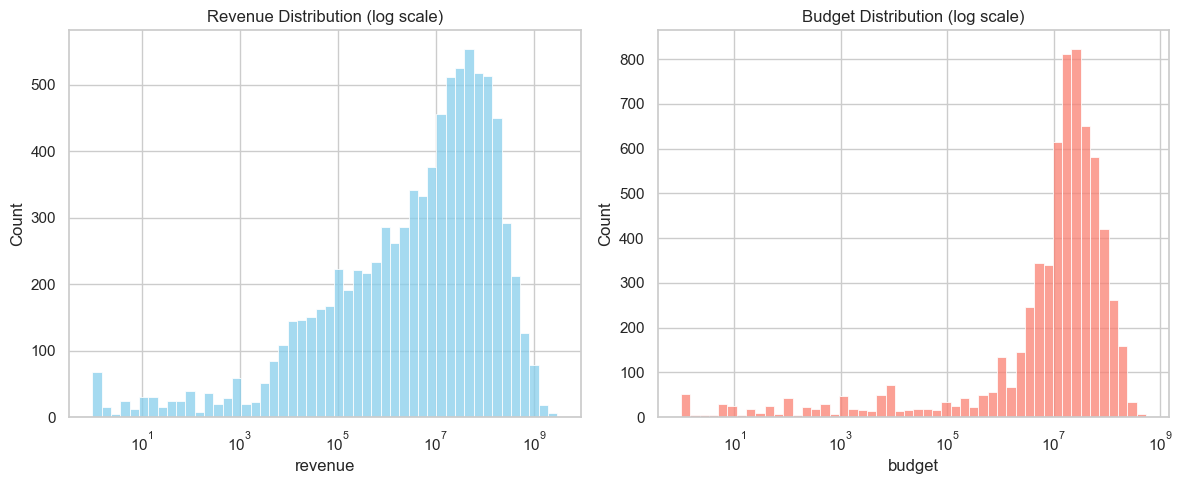

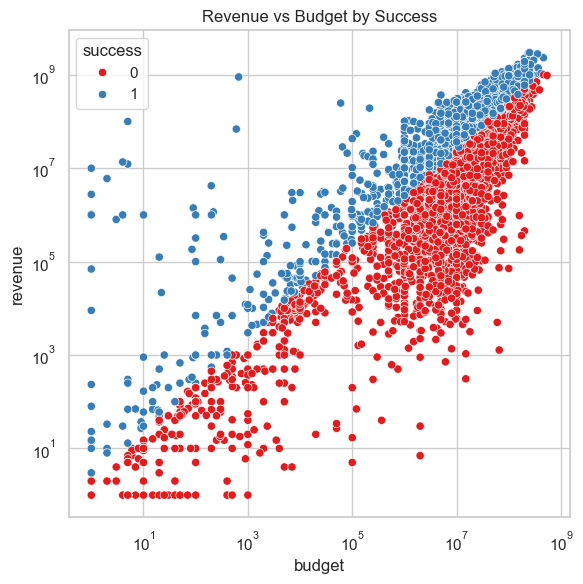

/var/folders/gz/f321ztbd7js180_qlpx97pgh0000gn/T/ipykernel_50042/3460360860.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='success', data=df, palette='pastel')


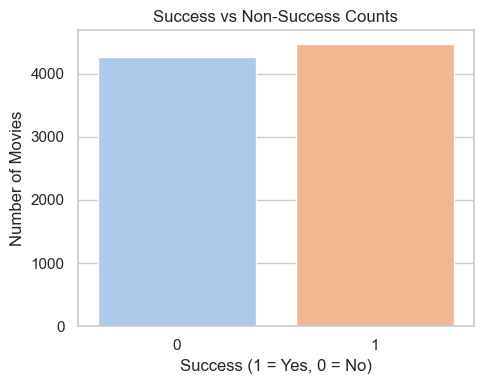

/var/folders/gz/f321ztbd7js180_qlpx97pgh0000gn/T/ipykernel_50042/3460360860.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='success', y='revenue', palette='Blues')
/var/folders/gz/f321ztbd7js180_qlpx97pgh0000gn/T/ipykernel_50042/3460360860.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='success', y='budget', palette='Oranges')


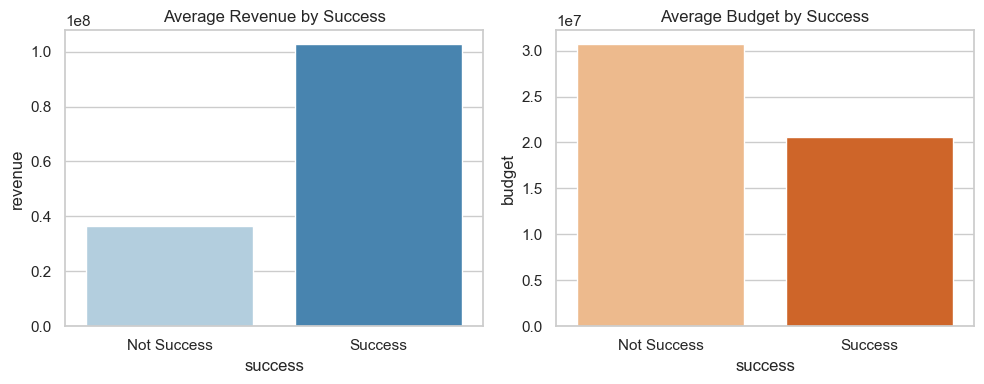

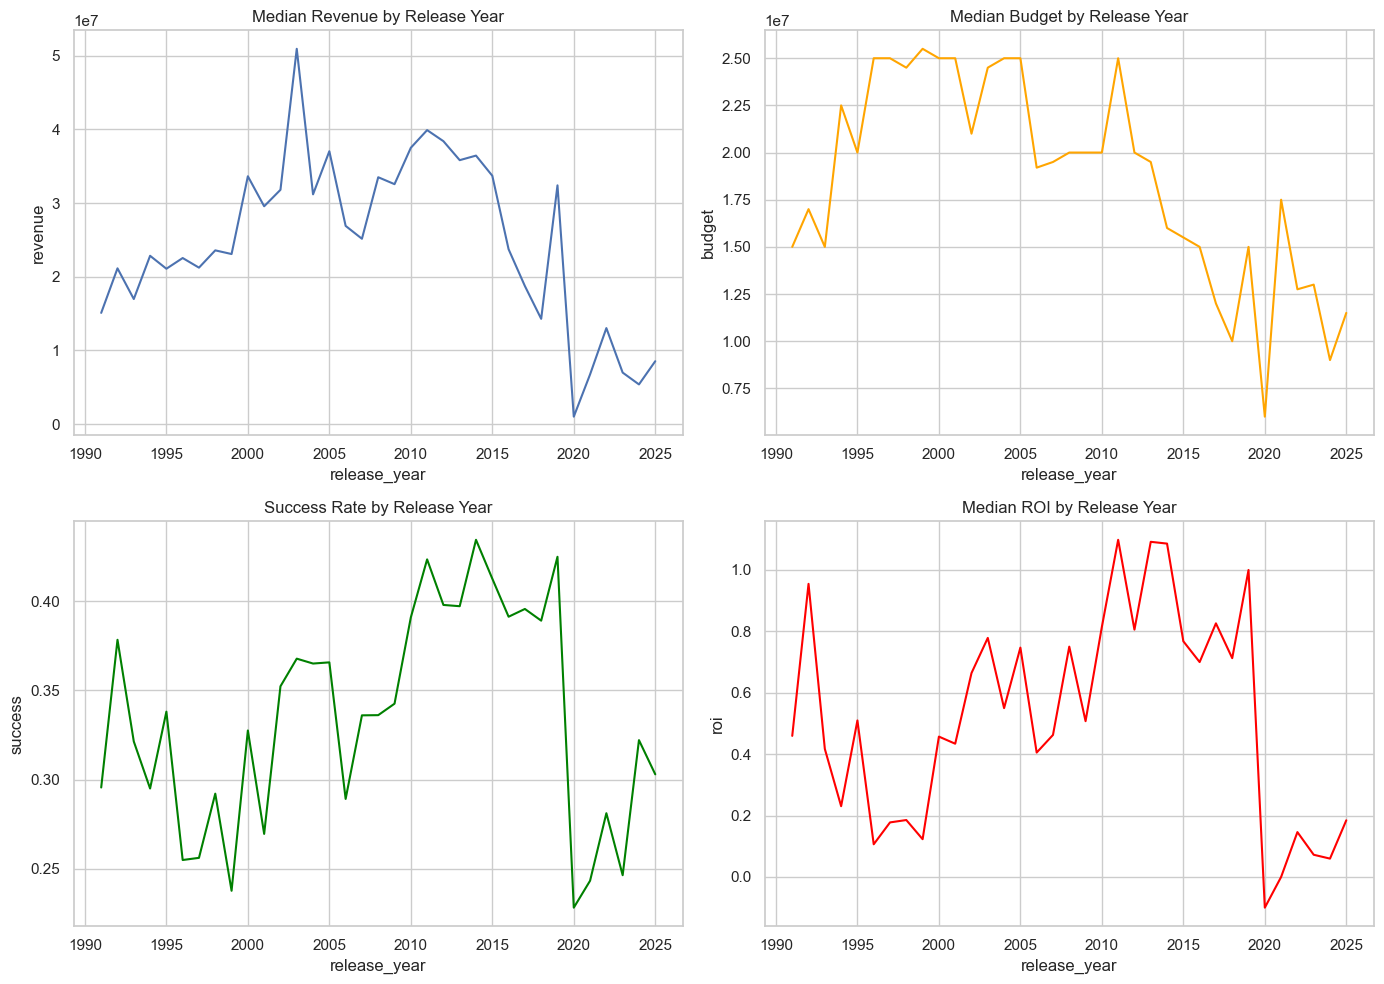

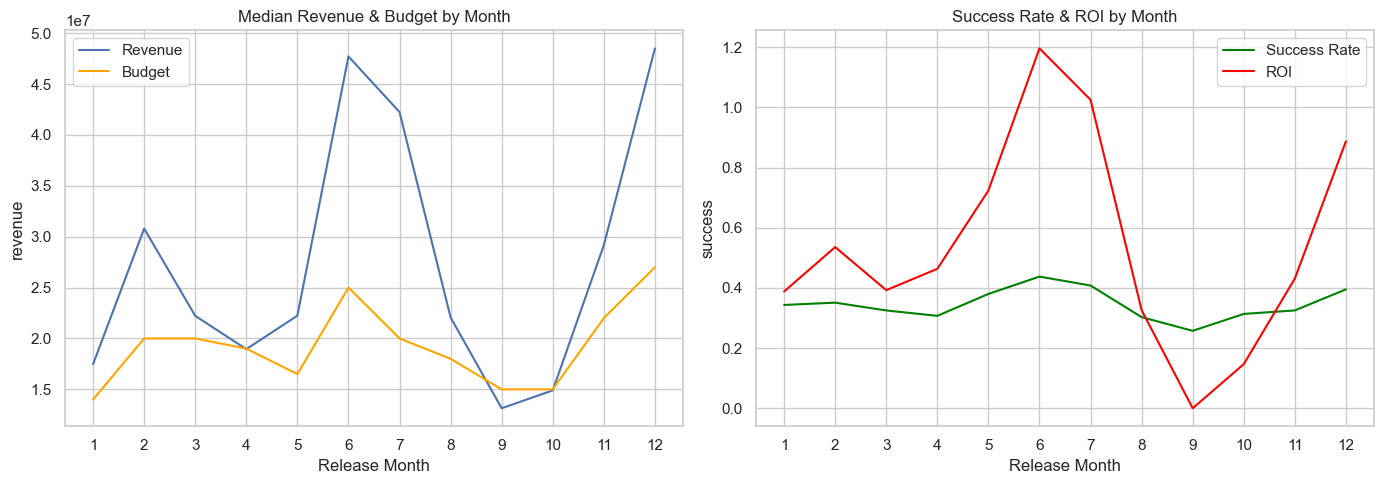

/var/folders/gz/f321ztbd7js180_qlpx97pgh0000gn/T/ipykernel_50042/3460360860.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_success_df, x='success_rate', y='genre', palette='viridis')


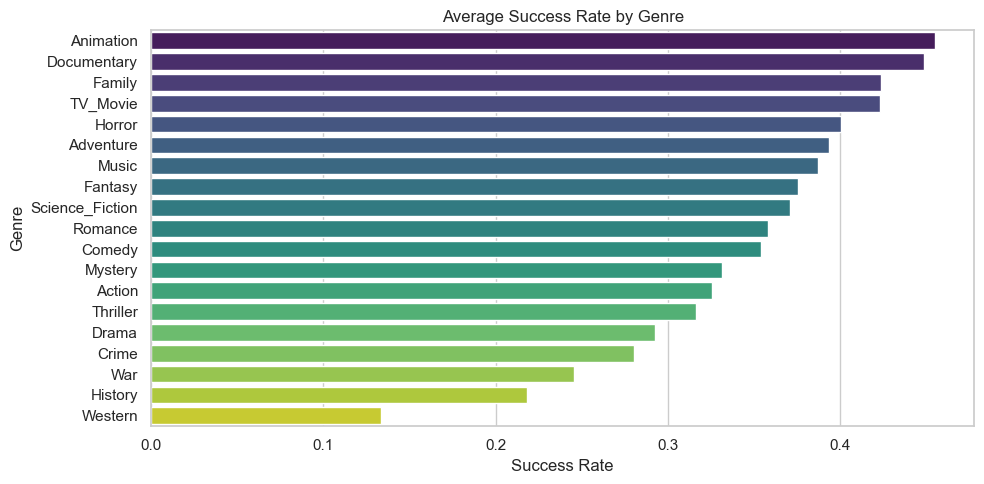

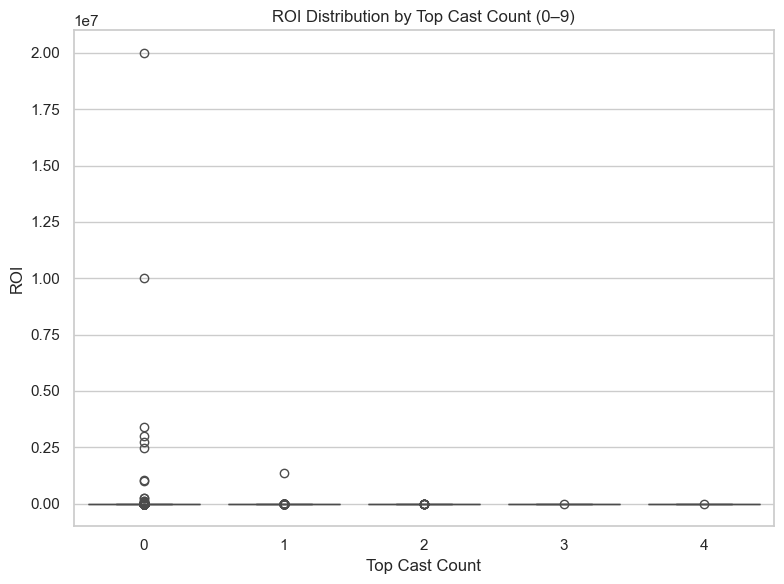

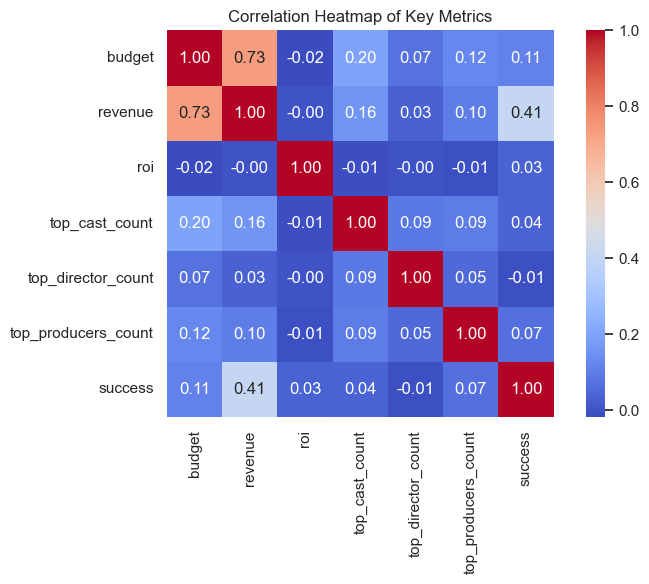

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ===============================
# STEP 1: Load and Validate Data
# ===============================
file_path = "/Users/gracesun/Desktop/ML2 Final EDA/final_tmdb_with_success.csv"
df = pd.read_csv(file_path)

null_counts = df.isnull().sum()
print("\n🔍 Null value check:\n", null_counts[null_counts > 0])

if null_counts.sum() != 0:
    print("\n⚠️ Null values exist — clean data before EDA.")
else:
    print("\n✅ No nulls found — proceeding with EDA...")

    # ===============================
    # STEP 2: Basic Descriptive Stats
    # ===============================
    print("\n📊 Basic Statistics:")
    print(df[['revenue', 'budget', 'success']].describe())

    # ===============================
    # STEP 3: Revenue & Budget Distributions
    # ===============================
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['revenue'], bins=50, log_scale=True, color='skyblue')
    plt.title("Revenue Distribution (log scale)")

    plt.subplot(1, 2, 2)
    sns.histplot(df['budget'], bins=50, log_scale=True, color='salmon')
    plt.title("Budget Distribution (log scale)")
    plt.tight_layout()
    plt.show()

    # ===============================
    # STEP 4: Revenue vs Budget Scatterplot
    # ===============================
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x='budget', y='revenue', hue='success', palette='Set1')
    plt.xscale('log')
    plt.yscale('log')
    plt.title("Revenue vs Budget by Success")
    plt.tight_layout()
    plt.show()

    # ===============================
    # STEP 5: Success Count Plot
    # ===============================
    plt.figure(figsize=(5, 4))
    sns.countplot(x='success', data=df, palette='pastel')
    plt.title("Success vs Non-Success Counts")
    plt.xlabel("Success (1 = Yes, 0 = No)")
    plt.ylabel("Number of Movies")
    plt.tight_layout()
    plt.show()

    # ===============================
    # STEP 6: Average Revenue/Budget by Success
    # ===============================
    grouped = df.groupby('success')[['revenue', 'budget']].mean().reset_index()
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.barplot(data=grouped, x='success', y='revenue', palette='Blues')
    plt.title("Average Revenue by Success")
    plt.xticks([0, 1], ['Not Success', 'Success'])

    plt.subplot(1, 2, 2)
    sns.barplot(data=grouped, x='success', y='budget', palette='Oranges')
    plt.title("Average Budget by Success")
    plt.xticks([0, 1], ['Not Success', 'Success'])
    plt.tight_layout()
    plt.show()

    # ===============================
    # STEP 7a: Time-Series Trends by Year
    # ===============================
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
    df = df[(df['budget'] > 0) & (df['revenue'] > 0)]
    df['roi'] = (df['revenue'] - df['budget']) / df['budget']

    yearly = df.groupby('release_year').agg({
        'revenue': 'median',
        'budget': 'median',
        'success': 'mean',
        'roi': 'median'
    }).reset_index()

    plt.figure(figsize=(14, 10))
    plt.subplot(2, 2, 1)
    sns.lineplot(data=yearly, x='release_year', y='revenue')
    plt.title('Median Revenue by Release Year')

    plt.subplot(2, 2, 2)
    sns.lineplot(data=yearly, x='release_year', y='budget', color='orange')
    plt.title('Median Budget by Release Year')

    plt.subplot(2, 2, 3)
    sns.lineplot(data=yearly, x='release_year', y='success', color='green')
    plt.title('Success Rate by Release Year')

    plt.subplot(2, 2, 4)
    sns.lineplot(data=yearly, x='release_year', y='roi', color='red')
    plt.title('Median ROI by Release Year')
    plt.tight_layout()
    plt.show()

    # ===============================
    # STEP 7b: Time-Series Trends by Month
    # ===============================
    df['release_month'] = pd.to_numeric(df['release_month'], errors='coerce')
    monthly = df.groupby('release_month').agg({
        'revenue': 'median',
        'budget': 'median',
        'success': 'mean',
        'roi': 'median'
    }).reset_index()

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.lineplot(data=monthly, x='release_month', y='revenue', label='Revenue')
    sns.lineplot(data=monthly, x='release_month', y='budget', label='Budget', color='orange')
    plt.title('Median Revenue & Budget by Month')
    plt.xlabel('Release Month')
    plt.xticks(range(1, 13))

    plt.subplot(1, 2, 2)
    sns.lineplot(data=monthly, x='release_month', y='success', label='Success Rate', color='green')
    sns.lineplot(data=monthly, x='release_month', y='roi', label='ROI', color='red')
    plt.title('Success Rate & ROI by Month')
    plt.xlabel('Release Month')
    plt.xticks(range(1, 13))

    plt.tight_layout()
    plt.show()

    # ===============================
    # STEP 8: Genre-Based Success Rate
    # ===============================
    genre_cols = [col for col in df.columns if col.startswith("genre_")]
    genre_success = {
        genre.replace("genre_", ""): df[df[genre] == 1]['success'].mean()
        for genre in genre_cols
    }

    genre_success_df = pd.DataFrame.from_dict(
        genre_success, orient='index', columns=['success_rate']
    ).reset_index().rename(columns={'index': 'genre'})
    genre_success_df.sort_values(by='success_rate', ascending=False, inplace=True)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=genre_success_df, x='success_rate', y='genre', palette='viridis')
    plt.title('Average Success Rate by Genre')
    plt.xlabel('Success Rate')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()

    # ===============================
    # STEP 9: ROI vs Top Cast Count
    # ===============================
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[df['top_cast_count'] < 10], x='top_cast_count', y='roi')
    plt.title('ROI Distribution by Top Cast Count (0–9)')
    plt.xlabel('Top Cast Count')
    plt.ylabel('ROI')
    plt.tight_layout()
    plt.show()

    # ===============================
    # STEP 10: Correlation Heatmap
    # ===============================
    features = ['budget', 'revenue', 'roi', 'top_cast_count',
                'top_director_count', 'top_producers_count', 'success']
    corr = df[features].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title("Correlation Heatmap of Key Metrics")
    plt.tight_layout()
    plt.show()
